In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

# 【学習のゴール】：pythonを用いてデータ分析ができるようになること
## 【学習内容】：タイタニック号の生き残り分析をPythonで行い、DataRobotで分析した特徴量インパクト等のインサイトと比較してみる

In [24]:
taitanic_df = pd.read_csv('C:/Users/s2441/Documents/Python Scripts/data/titanic_train.csv')
taitanic_df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
taitanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived       891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


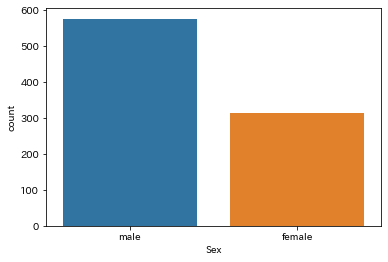

In [26]:
sns.countplot('Sex', data=taitanic_df)

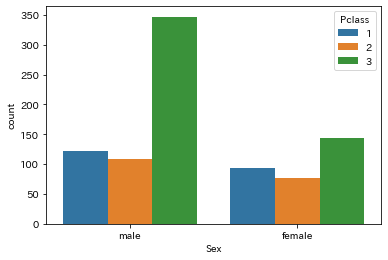

In [27]:
sns.countplot('Sex', data=taitanic_df,hue='Pclass')

In [28]:
#子供の概念を入れる
def male_female_child(passenger):
    age, sex = passenger

    if age < 16:
        return 'child'
    else:
       return sex 

In [29]:
taitanic_df['person'] = taitanic_df[['Age','Sex']].apply(male_female_child,axis=1)
taitanic_df.head(10)

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,0,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,0,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,0,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,1,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


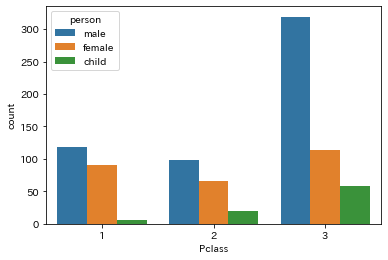

In [30]:
sns.countplot('Pclass', data=taitanic_df,hue='person')

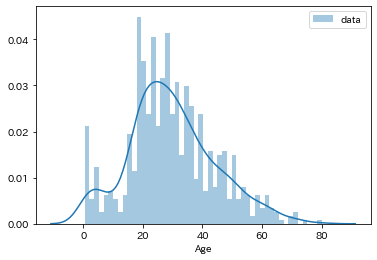

In [31]:
sns.distplot(taitanic_df['Age'], bins=50, label='data',kde=True,rug=False)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示

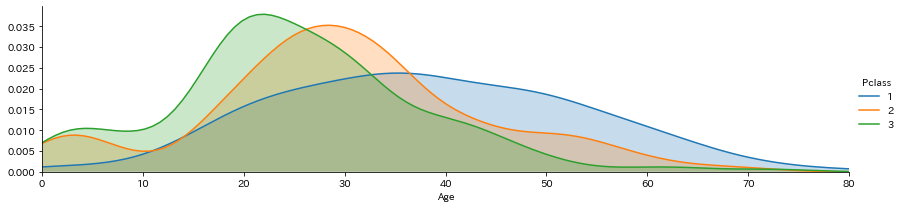

In [32]:
fig = sns.FacetGrid(taitanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = taitanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [33]:
deck = taitanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [34]:
levels = []
for level in deck:
    levels.append(level[0])

In [35]:
levels[0:5]

['C', 'C', 'E', 'G', 'C']

In [36]:
cabin_df = pd.DataFrame(levels, columns=['Cabin'])
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


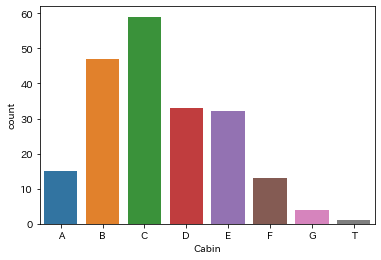

In [37]:
sns.countplot('Cabin',data=cabin_df, order=sorted(set(levels)))

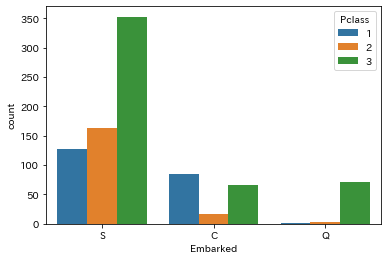

In [38]:
sns.countplot('Embarked',data=taitanic_df,hue='Pclass')

In [39]:
#Parch 親、子供と一緒の人数
#兄弟姉妹と一緒の人数
taitanic_df['Alone'] = taitanic_df['Parch'] + taitanic_df['SibSp']

In [40]:
taitanic_df['Alone'].loc[taitanic_df['Alone']>0] = 'With Family'
taitanic_df['Alone'].loc[taitanic_df['Alone'] == 0] = 'Alone'

In [42]:
taitanic_df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


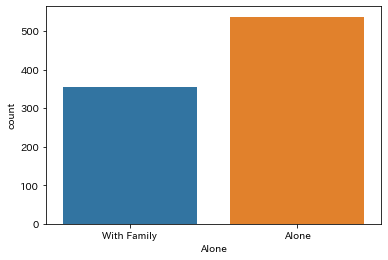

In [43]:
sns.countplot('Alone',data=taitanic_df)

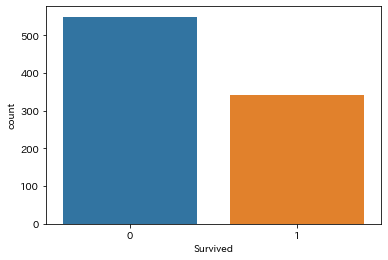

In [44]:
sns.countplot('Survived',data=taitanic_df)

C:\Users\s2441\AppData\Local\Continuum\anaconda3\envs\test3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


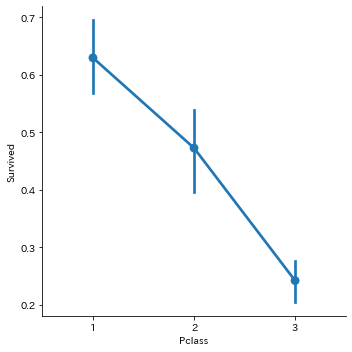

In [45]:
sns.factorplot('Pclass','Survived',data=taitanic_df,order=[1,2,3])

C:\Users\s2441\AppData\Local\Continuum\anaconda3\envs\test3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


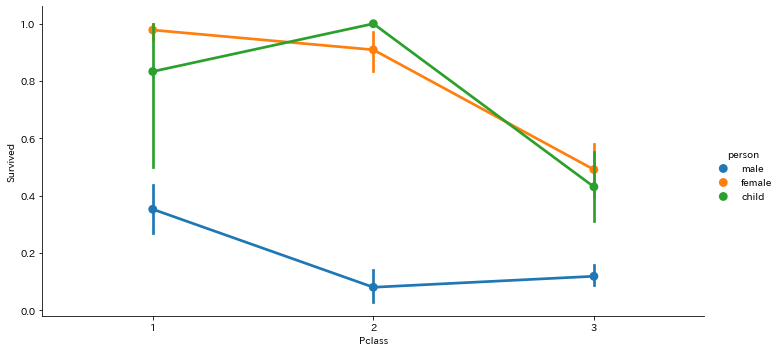

In [48]:
sns.factorplot('Pclass','Survived',data=taitanic_df,order=[1,2,3],hue='person', aspect=2)

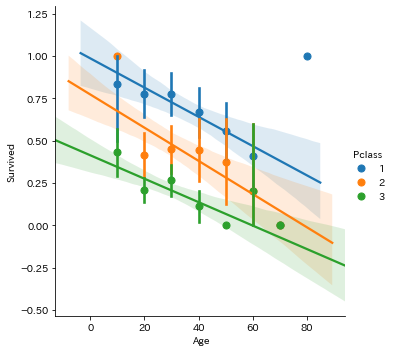

In [56]:
Ages = [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',data=taitanic_df, hue='Pclass', x_bins=Ages)

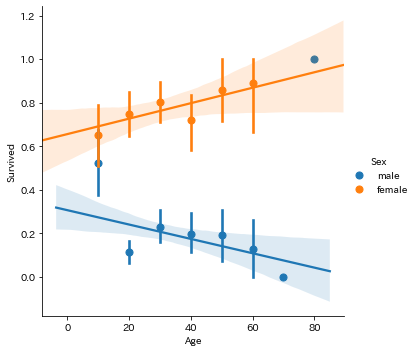

In [57]:
sns.lmplot('Age','Survived',data=taitanic_df, hue='Sex', x_bins=Ages)

In [58]:
file_name = './titanic_improvement_data.csv'
taitanic_df.to_csv(file_name, sep=",",encoding="utf-8")